<a href="https://colab.research.google.com/github/lcjln/Tour_datalab/blob/main/%EA%B5%AD%EB%82%B4%EA%B4%80%EA%B4%91%ED%99%9C%EC%84%B1%ED%99%94_%EA%B4%80%EB%A0%A8_%EC%A0%9C%EB%8F%84%EA%B0%9C%EC%84%A0_%EC%A0%95%EC%B1%85_%EA%B5%AD%EB%AF%BC%EC%9D%B8%EC%8B%9D_%EC%A1%B0%EC%82%AC%5B%EC%9D%BC%EB%B0%98%EA%B5%AD%EB%AF%BC%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본 패키지 설치

In [89]:
#기본 패키지
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
#plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import tensorflow as tf
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [90]:
!sudo apt-get install -y fonts-nanum
!apt-get -qq install fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

Text(0.5, 1.0, '한글 보임')

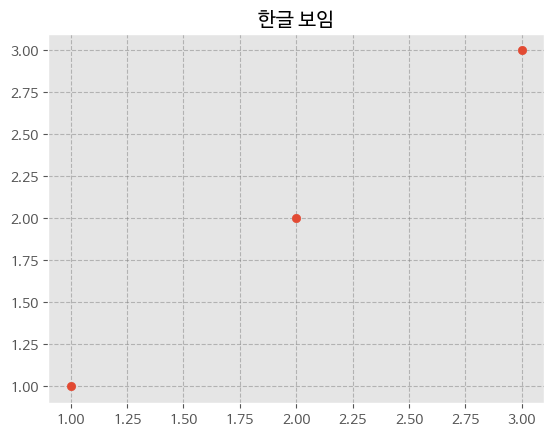

In [91]:
### 셀 실행 후 한글이 안보이면 런타임 다시 시작
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import matplotlib.pyplot as plt

### 그래프 기본 설정
plt.style.use('ggplot')
# ['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale','Solarize_Light2', 'tableau-colorblind10', '_classic_test']
plt.grid(True, axis='both', color='grey', alpha=0.5, linestyle='--')   # axis='y'
plt.rc('font', family='NanumBarunGothic')

plt.scatter([1,2,3],[1,2,3])    # plt 한글 확인
plt.title('한글 보임')

# 국내관광 설문조사 데이터 불러오기

In [92]:
#파일 불러오기
df = pd.read_excel('/content/addExcel_3005.xlsx')

# 연령대 확인하기 6 = 만 60~69세, 7 = 만 70세 이상
df['SQ2_1'].value_counts()

,count
SQ2_1,
6,223
5,157
4,141
2,129
3,121
7,29


In [93]:
# 연령대 결측치 확인
df['SQ2_1'].isnull().sum()

np.int64(0)

In [94]:
# 만 60세 이상만 데이터로 추출
df1 = df[(df['SQ2_1']==6) | (df['SQ2_1']==7)]
age = (df['SQ2_1']==6) | (df['SQ2_1']==7)
df1['SQ2_1'].value_counts() # 만 60세 이상은 총 252명

,count
SQ2_1,
6,223
7,29


In [95]:
df1.columns

Index(['pid', 'SQ1', 'SQ2', 'SQ2_1', 'Dummy1', 'SQ3', 'SQ4', 'Dummy2', 'q1',
       'GB', 'q2', 'q2_m2', 'q2_m3', 'q3', 'q350_op6', 'q4_1', 'q4_2', 'q4_3',
       'q4_4', 'q4_5', 'q4_6', 'q4_7', 'q4_8', 'q4_9', 'q4_10', 'q4_11',
       'q4_12', 'q5', 'q5_m2', 'q5_m3', 'q450_op9', 'q6', 'q6_m2', 'q6_m3',
       'q500_op12', 'q7', 'q8', 'q9', 'q10', 'q10_m2', 'q10_m3', 'q10_m4',
       'q10_m5', 'q10_m6', 'q10_m7', 'q10_m8', 'q10_m9', 'q700_op9', 'q11',
       'q11_n2', 'q11_n3', 'q11_n4', 'q11_n5', 'q11_n6', 'q11_n7', 'q11_n8',
       'q11_n9', 'q11_n10', 'q11_n11', 'q12', 'q12_n2', 'q12_n3', 'q12_n4',
       'q12_n5', 'q12_n6', 'q12_n7', 'q12_n8', 'q12_n9', 'q12_n10', 'q12_n11',
       'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20_1', 'q20_2',
       'q20_3', 'q20_4', 'q20_5', 'q20_6', 'DQ1', 'DQ2', 'DQ3', 'DQ4', 'DQ5',
       'q1450_op5'],
      dtype='object')

In [96]:
check = pd.crosstab(age, df['q2'])
check

q2,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
SQ2_1,,,,,,,,,,,,,,,,
False,118,60,16,7,6,4,2,52,102,14,16,24,28,22,29,48
True,31,23,6,5,0,2,3,24,55,4,16,9,22,12,21,19


In [97]:
# 번호를 지역 이름으로 치환
region_map = {
    1: '서울',
    2: '부산',
    3: '대구',
    4: '인천',
    5: '광주',
    6: '대전',
    7: '울산',
    8: '경기',
    9: '강원',
    10: '충북',
    11: '충남',
    12: '전북',
    13: '전남',
    14: '경북',
    15: '경남',
    16: '제주',
    17: '세종'
}

df['q2'] = df['q2'].replace(region_map)

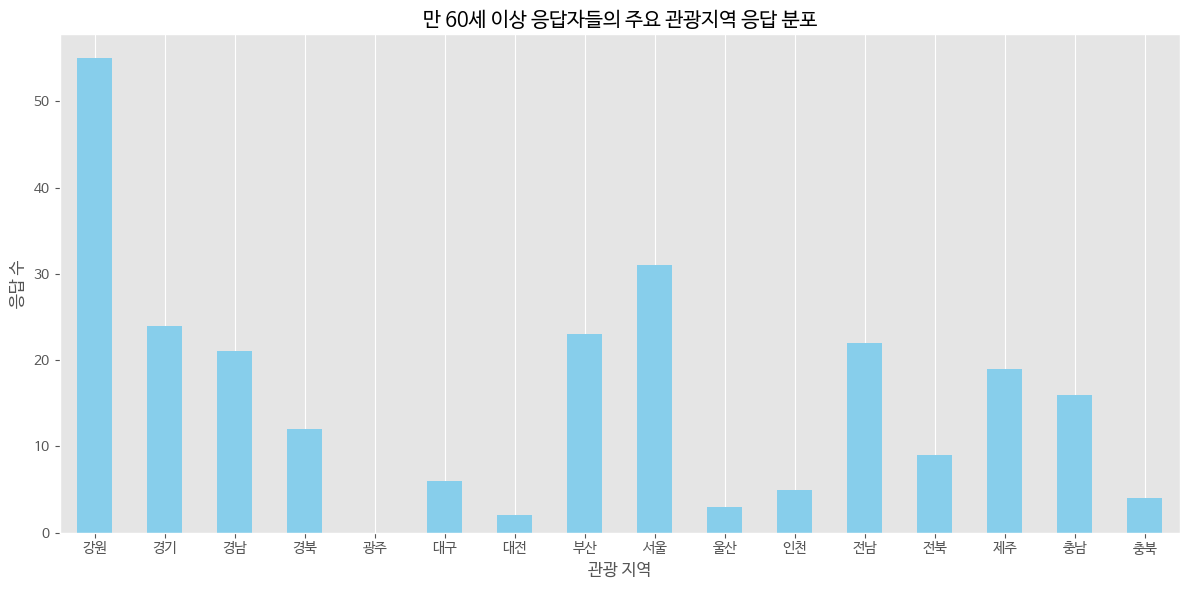

In [98]:
# 예: age는 True/False로 된 Series (True = 만 60세 이상)
# q2는 설문 항목 열

# 교차표 생성
check = pd.crosstab(age, df['q2'])

# True인 행만 추출
true_row = check.loc[True]

# 바 그래프 시각화
plt.figure(figsize=(12, 6))
true_row.plot(kind='bar', color='skyblue')  # 또는 'barh'로 수평 막대 가능
plt.title("만 60세 이상 응답자들의 주요 관광지역 응답 분포")
plt.xlabel("관광 지역")
plt.ylabel("응답 수")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [99]:
# 관광 지역으로 선택되는 평균 횟수 = 16.8회
MEAN = df1['q2'].value_counts().mean()
MEAN

# 각 지역은 16.8회의 선택을 받고 16.8회가 넘으면 평균보다 많이 관광 지역으로 선택받는 것이고 이하면 평균보다 적게 관광 지역으로 선택되는 것임을 알 수 있음

np.float64(16.8)

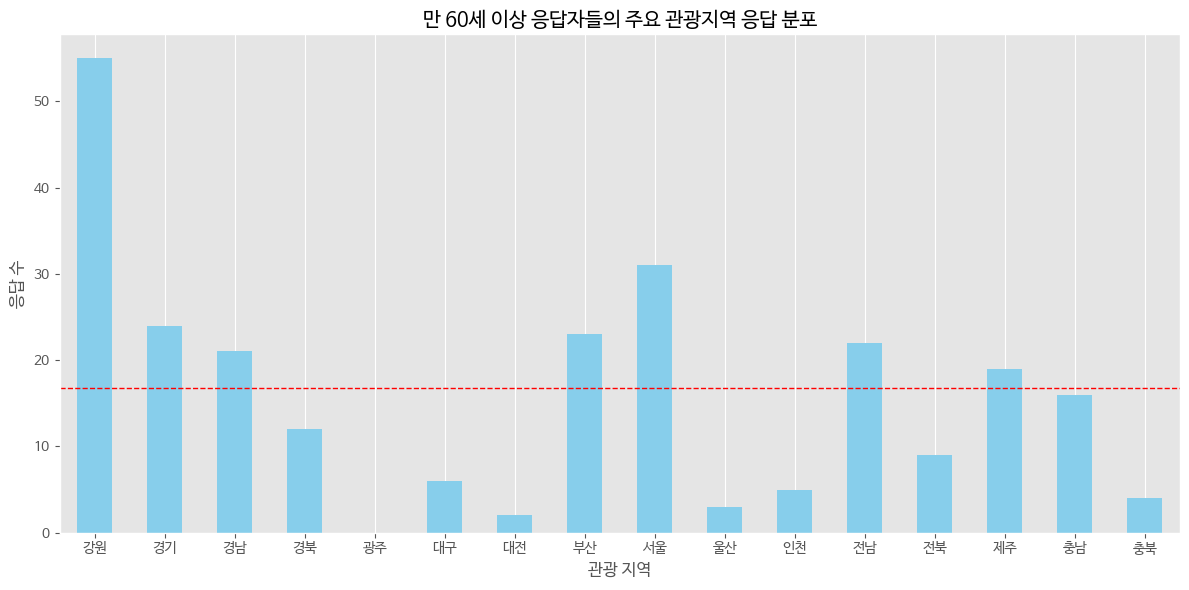

In [100]:
# 1. 교차표 생성
check = pd.crosstab(age, df['q2'])

# 2. True 행만 추출
true_row = check.loc[True]

# 3. 바 그래프 시각화
plt.figure(figsize=(12, 6))
ax = true_row.plot(kind='bar', color='skyblue')

# 4. y=16.8에 빨간 수평선 추가
plt.axhline(y=16.8, color='red', linestyle='--', linewidth=1)

# 5. 그래프 설정
plt.title("만 60세 이상 응답자들의 주요 관광지역 응답 분포")
plt.xlabel("관광 지역")
plt.ylabel("응답 수")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

시각화와 여행 지역 선택 평균 횟수를 보아 '경북', '광주', '대구', '대전', '울산', '인천','전북','충남', '충북'이 평균보다 적게 선택됨을 알 수 있고

이 중 지역 소멸이 빠르게 진행중인 지역을 고르면 될듯하다.

# 인구통계 분석


In [101]:
########################
##### 인구 통계 분석 ######
########################



dt = pd.read_csv('/content/201912_202412_population.csv', encoding='cp949')
dt.head()

,행정구역,2019년_계_총인구수,2019년_계_연령구간인구수,2019년_계_0~9세,2019년_계_10~19세,2019년_계_20~29세,2019년_계_30~39세,2019년_계_40~49세,2019년_계_50~59세,2019년_계_60~69세,...,2024년_여_10~19세,2024년_여_20~29세,2024년_여_30~39세,2024년_여_40~49세,2024년_여_50~59세,2024년_여_60~69세,2024년_여_70~79세,2024년_여_80~89세,2024년_여_90~99세,2024년_여_100세 이상
0,전국 (0000000000),"51,849,861","51,849,861","4,166,914","4,959,010","6,810,356","7,071,024","8,383,230","8,667,377","6,310,651",...,"2,245,507","2,855,132","3,166,585","3,796,703","4,315,099","3,968,224","2,254,795","1,326,374","252,368","7,052"
1,서울특별시 (1100000000),"9,729,107","9,729,107","662,693","819,571","1,456,623","1,509,959","1,560,983","1,539,968","1,189,802",...,"352,043","692,450","720,478","700,244","755,144","698,464","423,979","210,875","35,979","1,150"
2,부산광역시 (2600000000),"3,413,841","3,413,841","243,321","283,240","436,149","435,710","517,782","583,099","507,247",...,"127,955","175,150","188,127","233,041","274,368","297,863","184,530","92,007","14,561",368
3,대구광역시 (2700000000),"2,438,031","2,438,031","188,312","237,198","323,641","305,986","393,387","428,249","308,797",...,"103,130","127,260","131,690","173,617","214,102","196,231","114,083","63,905","10,606",223
4,인천광역시 (2800000000),"2,957,026","2,957,026","242,400","283,251","407,608","421,189","489,961","516,594","339,270",...,"132,857","169,872","201,668","230,963","259,061","233,050","113,641","62,357","12,706",411


In [102]:
dt.columns

Index(['행정구역', '2019년_계_총인구수', '2019년_계_연령구간인구수', '2019년_계_0~9세',
       '2019년_계_10~19세', '2019년_계_20~29세', '2019년_계_30~39세', '2019년_계_40~49세',
       '2019년_계_50~59세', '2019년_계_60~69세',
       ...
       '2024년_여_10~19세', '2024년_여_20~29세', '2024년_여_30~39세', '2024년_여_40~49세',
       '2024년_여_50~59세', '2024년_여_60~69세', '2024년_여_70~79세', '2024년_여_80~89세',
       '2024년_여_90~99세', '2024년_여_100세 이상'],
      dtype='object', length=235)

In [103]:
#2019년 인구 데이터
dt19 = dt.iloc[:,:14]
dt19 = dt19.drop(index=15)
dt19 = dt19.drop(index=11)
dt19 = dt19.reset_index(drop=True)
dt19

#2024년 인구 데이터
dt24 = dt.iloc[:,196:209]
dt24 = pd.concat([dt.iloc[:, 0], dt.iloc[:, 196:209]], axis=1)
dt24 = dt24.drop(index=14)
dt24 = dt24.drop(index=10)
dt24 = dt24.reset_index(drop=True)
dt24

,행정구역,2024년_계_총인구수,2024년_계_연령구간인구수,2024년_계_0~9세,2024년_계_10~19세,2024년_계_20~29세,2024년_계_30~39세,2024년_계_40~49세,2024년_계_50~59세,2024년_계_60~69세,2024년_계_70~79세,2024년_계_80~89세,2024년_계_90~99세,2024년_계_100세 이상
0,전국 (0000000000),"51,217,221","51,217,221","3,140,118","4,619,265","5,955,656","6,624,563","7,722,823","8,706,370","7,818,783","4,186,597","2,104,544","329,925","8,577"
1,서울특별시 (1100000000),"9,331,828","9,331,828","483,780","720,767","1,308,260","1,442,665","1,383,950","1,486,068","1,326,239","773,771","355,250","49,594","1,484"
2,부산광역시 (2600000000),"3,266,598","3,266,598","181,736","262,852","358,388","388,958","471,171","537,485","561,092","336,847","148,646","18,994",429
3,대구광역시 (2700000000),"2,363,629","2,363,629","142,228","212,438","268,100","282,632","344,645","418,181","375,530","205,143","100,506","13,966",260
4,인천광역시 (2800000000),"3,021,010","3,021,010","195,196","272,576","351,396","422,100","475,593","516,583","459,894","212,520","98,352","16,294",506
5,광주광역시 (2900000000),"1,408,422","1,408,422","92,837","145,418","182,033","173,762","219,511","243,154","190,637","103,523","49,754","7,612",181
6,대전광역시 (3000000000),"1,439,157","1,439,157","91,513","135,613","193,470","190,937","213,110","243,783","206,460","105,925","50,301","7,830",215
7,울산광역시 (3100000000),"1,098,049","1,098,049","73,097","109,370","117,157","136,293","173,188","202,978","175,205","77,310","29,297","4,068",86
8,세종특별자치시 (3600000000),"390,685","390,685","41,351","52,539","37,080","58,822","77,093","57,130","38,784","17,782","8,412","1,653",39
9,경기도 (4100000000),"13,694,685","13,694,685","939,988","1,318,307","1,627,548","1,907,383","2,214,874","2,357,607","1,911,010","905,114","440,674","70,233","1,947"


In [104]:
dt_sub = pd.DataFrame()  # 빈 데이터프레임 생성

# dt_sub의 첫 번째 열은 행정구역으로 그대로 사용
dt_sub[dt24.columns[0]] = dt24.iloc[:, 0]


# 19년 ~ 24년동안 인구 변화량

# 1. 쉼표 제거 및 숫자로 변환
col1 = dt19.iloc[:,1].str.replace(',', '')
col2 = dt24.iloc[:,1].str.replace(',', '')


# 3. 숫자형 변환 후 차이 계산
dt_sub['총 인구수 변화량'] = pd.to_numeric(col1, errors='coerce') - pd.to_numeric(col2, errors='coerce')

# 4. 결과 확인
dt_sub

,행정구역,총 인구수 변화량
0,전국 (0000000000),632640
1,서울특별시 (1100000000),397279
2,부산광역시 (2600000000),147243
3,대구광역시 (2700000000),74402
4,인천광역시 (2800000000),-63984
5,광주광역시 (2900000000),48046
6,대전광역시 (3000000000),35713
7,울산광역시 (3100000000),49970
8,세종특별자치시 (3600000000),-50110
9,경기도 (4100000000),-455019


In [105]:
### 연령별 인구 변화량 전부 추출하기 ###


# 0~9세 인구 변화량
col1 = dt19.iloc[:,3].str.replace(',', '')
col2 = dt24.iloc[:,3].str.replace(',', '')

dt_sub['0~9세 인구 변화량'] = pd.to_numeric(col1, errors='coerce') - pd.to_numeric(col2, errors='coerce')

# 10~19세 인구 변화량
col1 = dt19.iloc[:,4].str.replace(',', '')
col2 = dt24.iloc[:,4].str.replace(',', '')

dt_sub['10~19세 인구 변화량'] = pd.to_numeric(col1, errors='coerce') - pd.to_numeric(col2, errors='coerce')


# 20세~29세 인구 변화량
col1 = dt19.iloc[:,5].str.replace(',', '')
col2 = dt24.iloc[:,5].str.replace(',', '')

dt_sub['20~29세 인구 변화량'] = pd.to_numeric(col1, errors='coerce') - pd.to_numeric(col2, errors='coerce')

# 30세~39세 인구 변화량
col1 = dt19.iloc[:,6].str.replace(',', '')
col2 = dt24.iloc[:,6].str.replace(',', '')

dt_sub['30~39세 인구 변화량'] = pd.to_numeric(col1, errors='coerce') - pd.to_numeric(col2, errors='coerce')

# 40세~49세 인구 변화량
col1 = dt19.iloc[:,7].str.replace(',', '')
col2 = dt24.iloc[:,7].str.replace(',', '')

dt_sub['40~49세 인구 변화량'] = pd.to_numeric(col1, errors='coerce') - pd.to_numeric(col2, errors='coerce')

# 50세~59세 인구 변화량
col1 = dt19.iloc[:,8].str.replace(',', '')
col2 = dt24.iloc[:,8].str.replace(',', '')

dt_sub['50~59세 인구 변화량'] = pd.to_numeric(col1, errors='coerce') - pd.to_numeric(col2, errors='coerce')

# 60세~69세 인구 변화량
col1 = dt19.iloc[:,9].str.replace(',', '')
col2 = dt24.iloc[:,9].str.replace(',', '')

dt_sub['60~69세 인구 변화량'] = pd.to_numeric(col1, errors='coerce') - pd.to_numeric(col2, errors='coerce')

# 70세~79세 인구 변화량
col1 = dt19.iloc[:,10].str.replace(',', '')
col2 = dt24.iloc[:,10].str.replace(',', '')

dt_sub['70~79세 인구 변화량'] = pd.to_numeric(col1, errors='coerce') - pd.to_numeric(col2, errors='coerce')

# 80세~89세 인구 변화량
col1 = dt19.iloc[:,11].str.replace(',', '')
col2 = dt24.iloc[:,11].str.replace(',', '')

dt_sub['80~89세 인구 변화량'] = pd.to_numeric(col1, errors='coerce') - pd.to_numeric(col2, errors='coerce')

# 90세~99세 인구 변화량
col1 = dt19.iloc[:,12].str.replace(',', '')
col2 = dt24.iloc[:,12].str.replace(',', '')

dt_sub['90~99세 인구 변화량'] = pd.to_numeric(col1, errors='coerce') - pd.to_numeric(col2, errors='coerce')

# 100세 이상 인구 변화량
col1 = dt19.iloc[:,13].str.replace(',', '')
col2 = dt24.iloc[:,13].str.replace(',', '')

dt_sub['100세 이상 인구 변화량'] = pd.to_numeric(col1, errors='coerce') - pd.to_numeric(col2, errors='coerce')

dt_sub

,행정구역,총 인구수 변화량,0~9세 인구 변화량,10~19세 인구 변화량,20~29세 인구 변화량,30~39세 인구 변화량,40~49세 인구 변화량,50~59세 인구 변화량,60~69세 인구 변화량,70~79세 인구 변화량,80~89세 인구 변화량,90~99세 인구 변화량,100세 이상 인구 변화량
0,전국 (0000000000),632640,1026796,339745,854700,446461,660407,-38993,-1508132,-590553,-471208,-98166,11583
1,서울특별시 (1100000000),397279,178913,98804,148363,67294,177033,53900,-136437,-89684,-95763,-9904,4760
2,부산광역시 (2600000000),147243,61585,20388,77761,46752,46611,45614,-53845,-52737,-41320,-4927,1361
3,대구광역시 (2700000000),74402,46084,24760,55541,23354,48742,10068,-66733,-35031,-27448,-5353,418
4,인천광역시 (2800000000),-63984,47204,10675,56212,-911,14368,11,-120624,-41382,-25013,-4901,377
5,광주광역시 (2900000000),48046,33682,19013,25415,19181,25055,-9874,-37268,-12828,-12280,-2268,218
6,대전광역시 (3000000000),35713,30316,17566,19159,9543,29371,86,-38153,-18412,-11448,-2433,118
7,울산광역시 (3100000000),49970,31274,7363,31980,23450,17583,8381,-40554,-20364,-8075,-1140,72
8,세종특별자치시 (3600000000),-50110,5898,-12502,-740,2642,-12621,-14650,-11576,-4337,-1648,-590,14
9,경기도 (4100000000),-455019,245002,37155,143147,18444,75324,-158779,-511638,-167842,-115334,-22465,1967


/tmp/ipython-input-2534722135.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', num_colors)


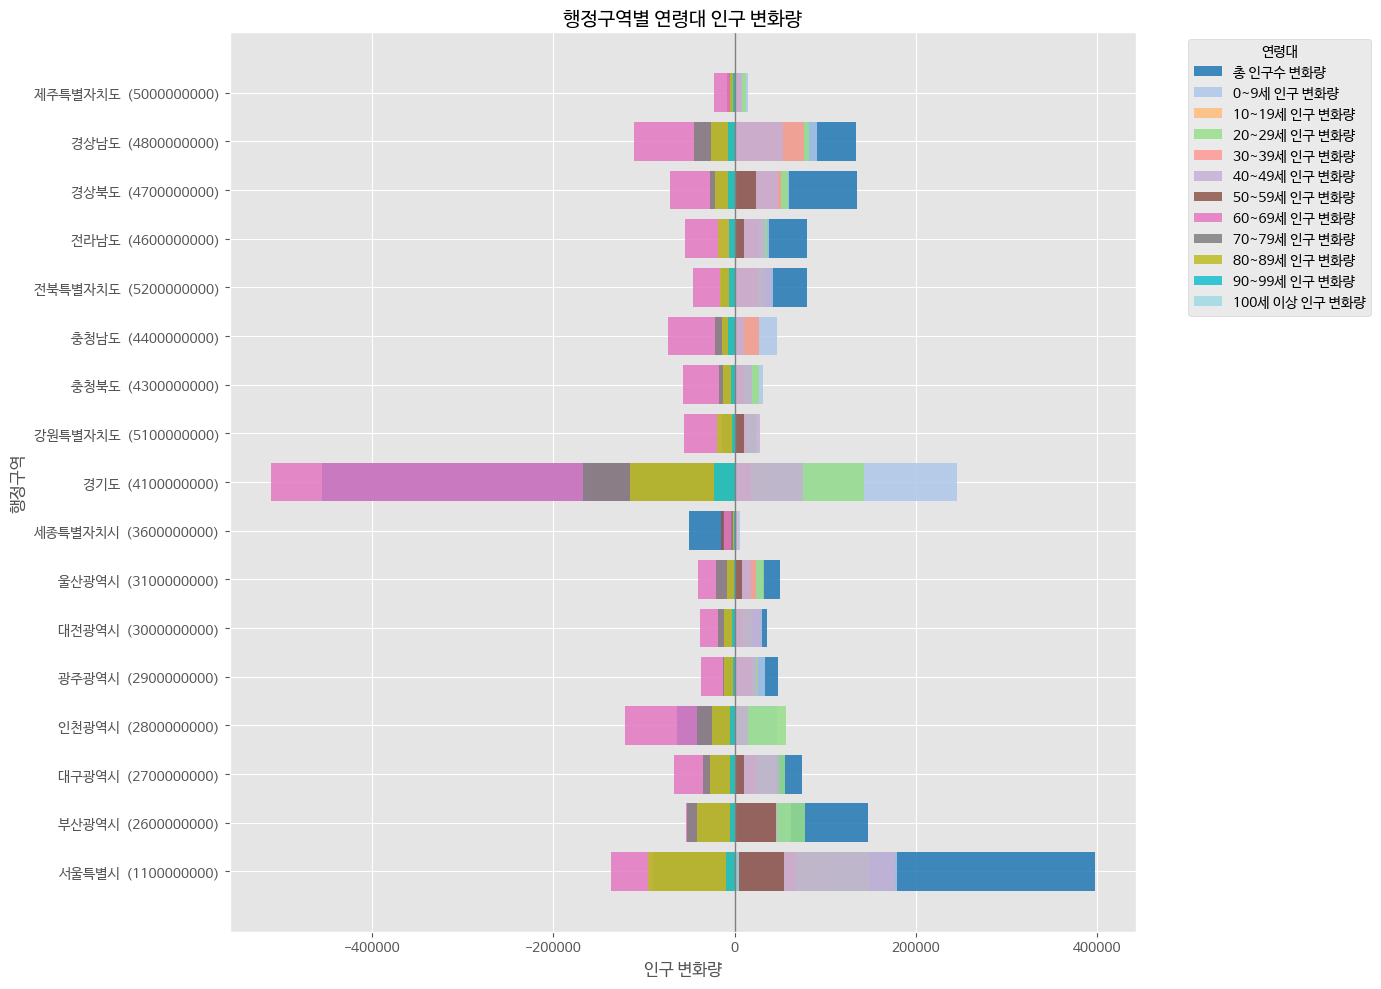

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# '전국' 제외
plot_df = dt_sub[~dt_sub['행정구역'].str.contains('전국')].copy()

# 긴 형식으로 변환
plot_df_melted = pd.melt(
    plot_df,
    id_vars='행정구역',
    var_name='연령대',
    value_name='인구 변화량'
)

# 색상 팔레트 (연령대마다 다른 색)
age_groups = plot_df_melted['연령대'].unique()
num_colors = len(age_groups)
colors = cm.get_cmap('tab20', num_colors)

# 시각화
plt.figure(figsize=(14, 10))

for i, age_group in enumerate(age_groups):
    subset = plot_df_melted[plot_df_melted['연령대'] == age_group]
    plt.barh(
        subset['행정구역'],
        subset['인구 변화량'],
        label=age_group,
        left=0,
        alpha=0.85,
        color=colors(i)  # 연령대별 색상 지정
    )

plt.title("행정구역별 연령대 인구 변화량", fontsize=14)
plt.xlabel("인구 변화량")
plt.ylabel("행정구역")
plt.axvline(x=0, color='gray', linewidth=1)  # x축 기준선
plt.legend(title='연령대', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-32195538.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', num_colors)


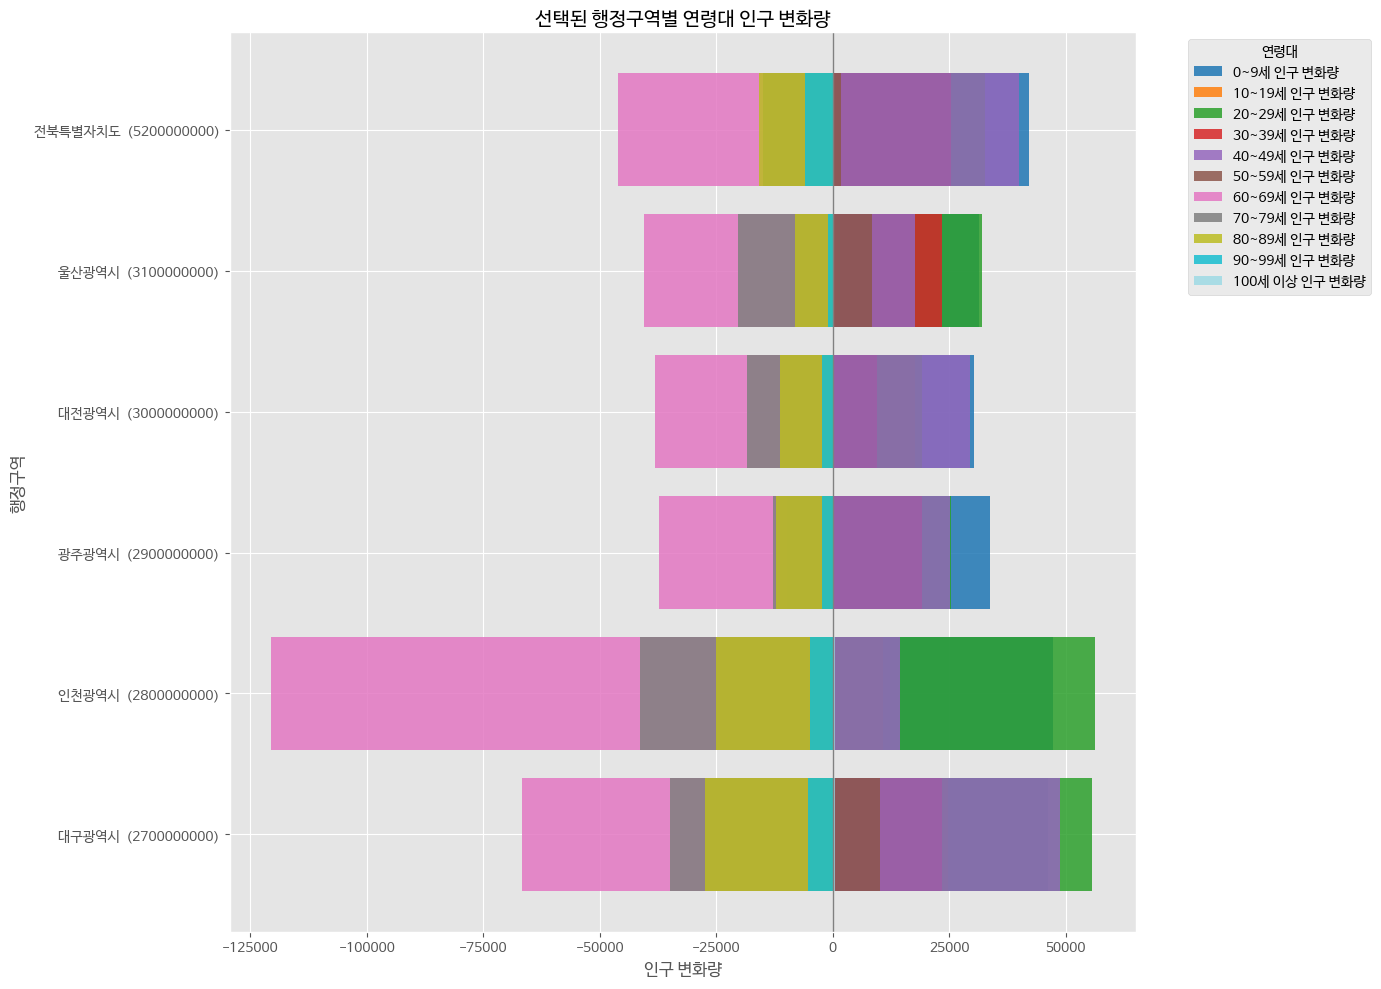

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 필터링할 지역
target_regions = ['경북', '광주', '대구', '대전', '울산', '인천', '전북', '충남', '충북']

# 해당 지역만 포함한 데이터프레임 복사
plot_df = dt_sub[dt_sub['행정구역'].str.contains('|'.join(target_regions))].copy()

# '총 인구수 변화량' 열 제거
plot_df = plot_df.drop(columns=['총 인구수 변화량'])

# 긴 형식으로 변환
plot_df_melted = pd.melt(
    plot_df,
    id_vars='행정구역',
    var_name='연령대',
    value_name='인구 변화량'
)

# 연령대별 고유 색상 지정
age_groups = plot_df_melted['연령대'].unique()
num_colors = len(age_groups)
colors = cm.get_cmap('tab20', num_colors)

# 그래프 그리기
plt.figure(figsize=(14, 10))

for i, age_group in enumerate(age_groups):
    subset = plot_df_melted[plot_df_melted['연령대'] == age_group]
    plt.barh(
        subset['행정구역'],
        subset['인구 변화량'],
        label=age_group,
        alpha=0.85,
        color=colors(i)
    )

plt.title("선택된 행정구역별 연령대 인구 변화량", fontsize=14)
plt.xlabel("인구 변화량")
plt.ylabel("행정구역")
plt.axvline(x=0, color='gray', linewidth=1)
plt.legend(title='연령대', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

인천이 인구 감소가 심각한데 인천을 겨냥하는게 나을수도 있겠다

In [108]:
# 읍면동 인구 통계 변화에서 '경북', '광주', '대구', '대전', '울산', '인천', '전북','충남', '충북' 만을 추출하여 지역 소멸이 우려되는 곳을 찾아본다
data = pd.read_csv('/content/201912_202412_population2.csv', encoding='cp949')

# 대상 지역 리스트
regions = ['경북', '광주광역시', '대구광역시', '대전광역시', '울산광역시', '인천광역시', '전북', '충남', '충북','경상북도','전라북도','충청남도','충청북도']

# 행정구역 열에서 해당 지역명 포함된 행만 필터링
filtered_data = data[data['행정구역'].str.contains('|'.join(regions))]
filtered_data

/tmp/ipython-input-3409580362.py:2: DtypeWarning: Columns (13,25,26,39,52,64,65,78,91,103,117,130,142,156,169,181,195,208,234) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/201912_202412_population2.csv', encoding='cp949')


,행정구역,2019년_계_총인구수,2019년_계_연령구간인구수,2019년_계_0~9세,2019년_계_10~19세,2019년_계_20~29세,2019년_계_30~39세,2019년_계_40~49세,2019년_계_50~59세,2019년_계_60~69세,...,2024년_여_10~19세,2024년_여_20~29세,2024년_여_30~39세,2024년_여_40~49세,2024년_여_50~59세,2024년_여_60~69세,2024년_여_70~79세,2024년_여_80~89세,2024년_여_90~99세,2024년_여_100세 이상
678,대구광역시 (2700000000),"2,438,031","2,438,031","188,312","237,198","323,641","305,986","393,387","428,249","308,797",...,"103,130","127,260","131,690","173,617","214,102","196,231","114,083","63,905","10,606",223
679,대구광역시 중구 (2711000000),"77,421","77,421","5,514","5,200","11,595","11,164","10,993","11,580","10,177",...,"3,565","7,268","8,336","7,019","7,085","6,148","4,477","2,652",439,16
680,대구광역시 중구 동인동(2711051700),"9,238","9,238",385,531,"1,553","1,241","1,219","1,436","1,327",...,280,781,863,571,704,657,526,327,66,2
681,대구광역시 중구 삼덕동(2711054500),"6,597","6,597",531,382,"1,665","1,248",920,691,576,...,252,908,621,505,415,340,229,140,19,1
682,대구광역시 중구 성내1동(2711056500),"4,893","4,893",186,243,"1,259",748,562,645,570,...,95,956,377,196,250,241,207,141,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,경상북도 울릉군 (4794000000),"9,617","9,617",461,524,905,977,"1,388","1,998","1,770",...,221,260,289,431,734,900,592,336,79,0
4070,경상북도 울릉군 울릉읍(4794025000),"6,766","6,766",332,413,660,721,"1,041","1,418","1,204",...,186,199,219,332,511,599,389,196,38,0
4071,경상북도 울릉군 서면(4794031000),911,911,49,43,75,71,104,200,178,...,13,19,25,37,74,97,70,48,15,0
4072,경상북도 울릉군 서면태하출장소(4794031500),501,501,17,16,41,37,47,98,111,...,7,6,8,10,37,50,44,25,9,0


In [149]:
filtered_data

,0
행정구역,0
2019년_계_총인구수,303
2019년_계_연령구간인구수,303
2019년_계_0~9세,303
2019년_계_10~19세,303
...,...
2024년_여_60~69세,292
2024년_여_70~79세,292
2024년_여_80~89세,292
2024년_여_90~99세,292


In [109]:
#2019년 인구 데이터
data19 = filtered_data.iloc[:,:14]
data19

#2024년 인구 데이터
data24 = filtered_data.iloc[:,196:209]
data24 = pd.concat([filtered_data.iloc[:, 0], filtered_data.iloc[:, 196:209]], axis=1)
data24

,행정구역,2024년_계_총인구수,2024년_계_연령구간인구수,2024년_계_0~9세,2024년_계_10~19세,2024년_계_20~29세,2024년_계_30~39세,2024년_계_40~49세,2024년_계_50~59세,2024년_계_60~69세,2024년_계_70~79세,2024년_계_80~89세,2024년_계_90~99세,2024년_계_100세 이상
678,대구광역시 (2700000000),"2,363,629","2,363,629","142,228","212,438","268,100","282,632","344,645","418,181","375,530","205,143","100,506","13,966",260
679,대구광역시 중구 (2711000000),"97,711","97,711","7,924","7,082","13,466","17,116","14,314","13,839","11,488","7,636","4,226",599,21
680,대구광역시 중구 동인동(2711051700),"10,008","10,008",463,592,"1,538","1,866","1,266","1,448","1,322",901,515,93,4
681,대구광역시 중구 삼덕동(2711054500),"7,106","7,106",401,497,"1,765","1,368",986,835,623,388,214,28,1
682,대구광역시 중구 성내1동(2711056500),"4,837","4,837",89,176,"1,596",865,455,528,510,353,227,36,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,경상북도 울릉군 (4794000000),"9,099","9,099",288,447,754,811,"1,159","1,853","2,009","1,137",542,99,0
4070,경상북도 울릉군 울릉읍(4794025000),"6,355","6,355",212,354,567,603,867,"1,323","1,318",748,313,50,0
4071,경상북도 울릉군 서면(4794031000),942,942,23,36,65,73,103,192,228,129,76,17,0
4072,경상북도 울릉군 서면태하출장소(4794031500),448,448,11,15,17,24,33,84,118,84,49,13,0


,0
행정구역,0
2024년_계_총인구수,292
2024년_계_연령구간인구수,292
2024년_계_0~9세,292
2024년_계_10~19세,292
2024년_계_20~29세,292
2024년_계_30~39세,292
2024년_계_40~49세,292
2024년_계_50~59세,292
2024년_계_60~69세,292


In [144]:
dt_sub = pd.DataFrame()  # 빈 데이터프레임 생성

# dt_sub의 첫 번째 열은 행정구역으로 그대로 사용
dt_sub[data24.columns[0]] = data24.iloc[:, 0]


# 19년 ~ 24년동안 인구 변화량

# 1. 쉼표 제거 및 숫자로 변환
col1 = data19.iloc[:,1].str.replace(',', '')
col2 = data24.iloc[:,1].str.replace(',', '')


# 3. 숫자형 변환 후 차이 계산
dt_sub['총 인구수 변화'] = pd.to_numeric(col2, errors='coerce') - pd.to_numeric(col1, errors='coerce')
dt_sub['총 인구수 변화율(%)'] = ((pd.to_numeric(col2, errors='coerce') - pd.to_numeric(col1, errors='coerce'))/pd.to_numeric(col1, errors='coerce'))*100

# 4. 결과 확인
dt_sub


,0
행정구역,0
총 인구수 변화,592
총 인구수 변화율(%),592


In [146]:
### 연령별 인구 변화량 전부 추출하기 ###


# 0~9세 인구 변화량
col1 = data19.iloc[:,3].str.replace(',', '')
col2 = data24.iloc[:,3].str.replace(',', '')

dt_sub['0~9세 인구 변화량'] = pd.to_numeric(col2, errors='coerce') - pd.to_numeric(col1, errors='coerce')
dt_sub['0~9세 인구 변화율(%)'] = ((pd.to_numeric(col2, errors='coerce') - pd.to_numeric(col1, errors='coerce'))/pd.to_numeric(col1, errors='coerce'))*100


# 10~19세 인구 변화량
col1 = data19.iloc[:,4].str.replace(',', '')
col2 = data24.iloc[:,4].str.replace(',', '')

dt_sub['10~19세 인구 변화량'] = pd.to_numeric(col2, errors='coerce') - pd.to_numeric(col1, errors='coerce')
dt_sub['10~19세 인구 변화율(%)'] = ((pd.to_numeric(col2, errors='coerce') - pd.to_numeric(col1, errors='coerce'))/pd.to_numeric(col1, errors='coerce'))*100



# 20세~29세 인구 변화량
col1 = data19.iloc[:,5].str.replace(',', '')
col2 = data24.iloc[:,5].str.replace(',', '')

dt_sub['20~29세 인구 변화량'] = pd.to_numeric(col2, errors='coerce') - pd.to_numeric(col1, errors='coerce')
dt_sub['20~29세 인구 변화율(%)'] = ((pd.to_numeric(col2, errors='coerce') - pd.to_numeric(col1, errors='coerce'))/pd.to_numeric(col1, errors='coerce'))*100


# 30세~39세 인구 변화량
col1 = data19.iloc[:,6].str.replace(',', '')
col2 = data24.iloc[:,6].str.replace(',', '')

dt_sub['30~39세 인구 변화량'] = pd.to_numeric(col2, errors='coerce') - pd.to_numeric(col1, errors='coerce')
dt_sub['30~39세 인구 변화율(%)'] = ((pd.to_numeric(col2, errors='coerce') - pd.to_numeric(col1, errors='coerce'))/pd.to_numeric(col1, errors='coerce'))*100


# 40세~49세 인구 변화량
col1 = data19.iloc[:,7].str.replace(',', '')
col2 = data24.iloc[:,7].str.replace(',', '')

dt_sub['40~49세 인구 변화량'] = pd.to_numeric(col2, errors='coerce') - pd.to_numeric(col1, errors='coerce')
dt_sub['40~49세 인구 변화율(%)'] = ((pd.to_numeric(col2, errors='coerce') - pd.to_numeric(col1, errors='coerce'))/pd.to_numeric(col1, errors='coerce'))*100


# 50세~59세 인구 변화량
col1 = data19.iloc[:,8].str.replace(',', '')
col2 = data24.iloc[:,8].str.replace(',', '')

dt_sub['50~59세 인구 변화량'] = pd.to_numeric(col2, errors='coerce') - pd.to_numeric(col1, errors='coerce')
dt_sub['50~59세 이눅 변화율(%)'] = ((pd.to_numeric(col2, errors='coerce') - pd.to_numeric(col1, errors='coerce'))/pd.to_numeric(col1, errors='coerce'))*100


# 60세~69세 인구 변화량
col1 = data19.iloc[:,9].str.replace(',', '')
col2 = data24.iloc[:,9].str.replace(',', '')

dt_sub['60~69세 인구 변화량'] = pd.to_numeric(col2, errors='coerce') - pd.to_numeric(col1, errors='coerce')
dt_sub['60~69세 인구 변화율(%)'] = ((pd.to_numeric(col2, errors='coerce') - pd.to_numeric(col1, errors='coerce'))/pd.to_numeric(col1, errors='coerce'))*100


# 70세~79세 인구 변화량
col1 = data19.iloc[:,10].str.replace(',', '')
col2 = data24.iloc[:,10].str.replace(',', '')

dt_sub['70~79세 인구 변화량'] = pd.to_numeric(col2, errors='coerce') - pd.to_numeric(col1, errors='coerce')
dt_sub['70~79세 인구 변화율(%)'] = ((pd.to_numeric(col2, errors='coerce') - pd.to_numeric(col1, errors='coerce'))/pd.to_numeric(col1, errors='coerce'))*100


# 80세~89세 인구 변화량
col1 = data19.iloc[:,11].str.replace(',', '')
col2 = data24.iloc[:,11].str.replace(',', '')

dt_sub['80~89세 인구 변화량'] = pd.to_numeric(col2, errors='coerce') - pd.to_numeric(col1, errors='coerce')
dt_sub['80~89세 인구 변화율(%)'] = ((pd.to_numeric(col2, errors='coerce') - pd.to_numeric(col1, errors='coerce'))/pd.to_numeric(col1, errors='coerce'))*100


# 90세~99세 인구 변화량
col1 = data19.iloc[:,12].str.replace(',', '')
col2 = data24.iloc[:,12].str.replace(',', '')

dt_sub['90~99세 인구 변화량'] = pd.to_numeric(col2, errors='coerce') - pd.to_numeric(col1, errors='coerce')
dt_sub['90~99세 인구 변화율(%)'] = ((pd.to_numeric(col2, errors='coerce') - pd.to_numeric(col1, errors='coerce'))/pd.to_numeric(col1, errors='coerce'))*100


# 100세 이상 인구 변화량
col1 = data19.iloc[:,13].str.replace(',', '')
col2 = data24.iloc[:,13].str.replace(',', '')

dt_sub['100세 이상 인구 변화량'] = pd.to_numeric(col2, errors='coerce') - pd.to_numeric(col1, errors='coerce')
dt_sub['100세 이상 인구 변화율(%)'] = ((pd.to_numeric(col2, errors='coerce') - pd.to_numeric(col1, errors='coerce'))/pd.to_numeric(col1, errors='coerce'))*100

dt_sub = dt_sub.sort_values(by='총 인구수 변화율(%)', ascending=True).reset_index(drop=True)
dt_sub

,0
행정구역,0
총 인구수 변화,592
총 인구수 변화율(%),592
0~9세 인구 변화량,1338
0~9세 인구 변화율(%),1338
10~19세 인구 변화량,1338
10~19세 인구 변화율(%),1338
20~29세 인구 변화량,1338
20~29세 인구 변화율(%),1338
30~39세 인구 변화량,1338


In [112]:
# "총 인구수 변화량" 열을 기준으로 내림차순 정렬
dt_sub = dt_sub.sort_values(by='총 인구수 변화율(%)', ascending=True).reset_index(drop=True)
dt_sub.head(20)

,행정구역,총 인구수 변화,총 인구수 변화율(%),0~9세 인구 변화량,0~9세 인구 변화율(%),10~19세 인구 변화량,10~19세 인구 변화율(%),20~29세 인구 변화량,20~29세 인구 변화율(%),30~39세 인구 변화량,...,60~69세 인구 변화량,60~69세 인구 변화율(%),70~79세 인구 변화량,70~79세 인구 변화율(%),80~89세 인구 변화량,80~89세 인구 변화율(%),90~99세 인구 변화량,90~99세 인구 변화율(%),100세 이상 인구 변화량,100세 이상 인구 변화율(%)
0,대전광역시 서구 가수원동(3017059000),-30841.0,-75.123009,-5276.0,-92.189411,-3777.0,-81.559059,-3895.0,-78.370221,-5798.0,...,-1474.0,-42.174535,-403.0,-27.546138,-67.0,-11.260504,-31.0,-30.097087,0.0,0.000000
1,광주광역시 남구 효덕동(2915571000),-32122.0,-68.040669,-3195.0,-75.603407,-4577.0,-73.208573,-4992.0,-73.791574,-3974.0,...,-2913.0,-57.878005,-1534.0,-52.480328,-659.0,-55.942275,-102.0,-57.954545,-1.0,-12.500000
2,인천광역시 동구 송림2동(2814059000),-1861.0,-60.304601,-96.0,-91.428571,-128.0,-69.565217,-184.0,-67.153285,-197.0,...,-329.0,-52.724359,-229.0,-50.219298,-90.0,-39.301310,-7.0,-20.588235,-4.0,-66.666667
3,광주광역시 북구 건국동(2917069500),-28258.0,-55.617226,-5161.0,-69.461642,-3574.0,-56.983418,-3162.0,-56.615936,-5988.0,...,-929.0,-27.331568,-539.0,-32.294787,-214.0,-28.958051,-21.0,-19.266055,-5.0,-62.500000
4,충청북도 청주시 서원구 사직1동(4311251000),-4250.0,-50.947015,-214.0,-58.152174,-366.0,-59.319287,-648.0,-62.912621,-470.0,...,-496.0,-36.659276,-374.0,-45.777234,-152.0,-36.803874,-17.0,-30.909091,-9.0,-100.000000
5,광주광역시 서구 광천동(2914073000),-3131.0,-36.714353,-135.0,-24.368231,-174.0,-28.477905,-510.0,-45.495094,-257.0,...,-458.0,-38.103161,-351.0,-46.428571,-127.0,-43.197279,-28.0,-51.851852,-10.0,-100.000000
6,대구광역시 달서구 진천동(2729061500),-27874.0,-35.918714,-6185.0,-65.630306,-3954.0,-46.040987,-3640.0,-38.922156,-6168.0,...,401.0,5.313370,390.0,11.416862,280.0,19.746121,95.0,60.509554,-17.0,-89.473684
7,대전광역시 유성구 원신흥동(3020061000),-16389.0,-35.223951,-2580.0,-44.329897,-2069.0,-40.680299,-2443.0,-44.161244,-3014.0,...,-622.0,-14.869711,-58.0,-3.848706,-70.0,-11.400651,-18.0,-15.652174,3.0,150.000000
8,인천광역시 동구 송림3.5동(2814060500),-2931.0,-34.678183,-382.0,-63.140496,-248.0,-33.333333,-354.0,-39.333333,-522.0,...,-313.0,-25.488599,-229.0,-27.623643,0.0,0.000000,-12.0,-22.641509,-8.0,-88.888889
9,광주광역시 서구 양동(2914057500),-1336.0,-31.977022,-59.0,-50.862069,-70.0,-40.935673,-241.0,-53.318584,-162.0,...,-169.0,-21.694480,-199.0,-26.855601,56.0,20.588235,17.0,45.945946,-7.0,-87.500000


구나 시 단위로만 인구 변화 확인하기

In [113]:
# 괄호 및 숫자 제거 (예: "서울특별시 중구 (1100000000)" → "서울특별시 중구")
dt_sub['행정구역_정제'] = dt_sub['행정구역'].str.replace(r"\s*\([^)]*\)", "", regex=True)

# 공백 기준으로 나눈 단어가 2개인 데이터만 필터링
dt_sub = dt_sub[dt_sub['행정구역_정제'].str.split().str.len() == 2].copy()

# '행정구역' 컬럼을 정제된 값으로 덮어쓰기
dt_sub['행정구역'] = dt_sub['행정구역_정제']

# 정제용 임시 컬럼 삭제
dt_sub.drop(columns=['행정구역_정제'], inplace=True)

# 총 인구수 변화율 기준 정렬 및 인덱스 재설정
dt_sub = dt_sub.sort_values(by='총 인구수 변화율(%)', ascending=True).reset_index(drop=True)

# 결과 확인
dt_sub.head(20)

,행정구역,총 인구수 변화,총 인구수 변화율(%),0~9세 인구 변화량,0~9세 인구 변화율(%),10~19세 인구 변화량,10~19세 인구 변화율(%),20~29세 인구 변화량,20~29세 인구 변화율(%),30~39세 인구 변화량,...,60~69세 인구 변화량,60~69세 인구 변화율(%),70~79세 인구 변화량,70~79세 인구 변화율(%),80~89세 인구 변화량,80~89세 인구 변화율(%),90~99세 인구 변화량,90~99세 인구 변화율(%),100세 이상 인구 변화량,100세 이상 인구 변화율(%)
0,경상북도 영덕군,-4151.0,-11.110516,-776.0,-41.968632,-401.0,-17.990130,-951.0,-35.538117,-838.0,...,398.0,5.564877,-442.0,-7.284113,699.0,19.508792,208.0,43.697479,-12.0,-42.857143
1,충청남도 부여군,-7190.0,-10.773150,-1273.0,-40.183081,-1115.0,-22.092332,-1873.0,-32.410452,-1216.0,...,1255.0,10.034381,221.0,2.367434,304.0,4.892966,421.0,46.519337,-19.0,-35.849057
2,충청북도 영동군,-5187.0,-10.642620,-1140.0,-44.151820,-891.0,-24.042094,-1701.0,-35.533737,-1059.0,...,1647.0,18.878955,66.0,1.022780,476.0,12.463996,93.0,17.095588,-12.0,-40.000000
3,경상북도 봉화군,-3314.0,-10.307932,-688.0,-44.908616,-297.0,-14.984864,-787.0,-36.034799,-732.0,...,949.0,14.676771,-147.0,-3.034682,361.0,11.720779,151.0,32.473118,-12.0,-42.857143
4,경상북도 영양군,-1665.0,-9.798152,-345.0,-43.178974,-155.0,-15.210991,-423.0,-34.958678,-266.0,...,426.0,12.920837,-273.0,-9.873418,275.0,16.646489,92.0,42.592593,-16.0,-59.259259
5,인천광역시 동구,-6131.0,-9.516197,-1764.0,-40.607735,-993.0,-18.446963,-1090.0,-15.910086,-1363.0,...,499.0,5.141680,257.0,3.958718,701.0,25.972582,105.0,25.990099,-56.0,-74.666667
6,경상북도 상주시,-8838.0,-8.777610,-1569.0,-28.783709,-1134.0,-13.790587,-2823.0,-30.947161,-1896.0,...,2180.0,12.303872,279.0,2.183611,827.0,10.227554,476.0,39.666667,-4.0,-8.163265
7,인천광역시 남동구,-46479.0,-8.725108,-19242.0,-42.160386,-6664.0,-12.836120,-15466.0,-21.358633,-16044.0,...,16885.0,27.720773,7789.0,26.459897,4586.0,39.096334,646.0,34.563938,-39.0,-32.773109
8,충청남도 서천군,-4601.0,-8.713190,-915.0,-36.820926,-722.0,-19.598263,-1166.0,-28.089617,-942.0,...,912.0,9.221436,210.0,2.650511,356.0,6.896552,408.0,56.353591,-17.0,-41.463415
9,충청남도 논산시,-10313.0,-8.677908,-2599.0,-33.691989,-1735.0,-16.790864,-3023.0,-25.273807,-2268.0,...,2671.0,13.976975,811.0,6.338413,612.0,7.729225,532.0,47.884788,-52.0,-59.770115


In [114]:
top20['행정구역'].value_counts()

,count
행정구역,
경상북도 영덕군,1
충청남도 부여군,1
충청북도 영동군,1
경상북도 봉화군,1
경상북도 영양군,1
인천광역시 동구,1
경상북도 상주시,1
인천광역시 남동구,1
충청남도 서천군,1


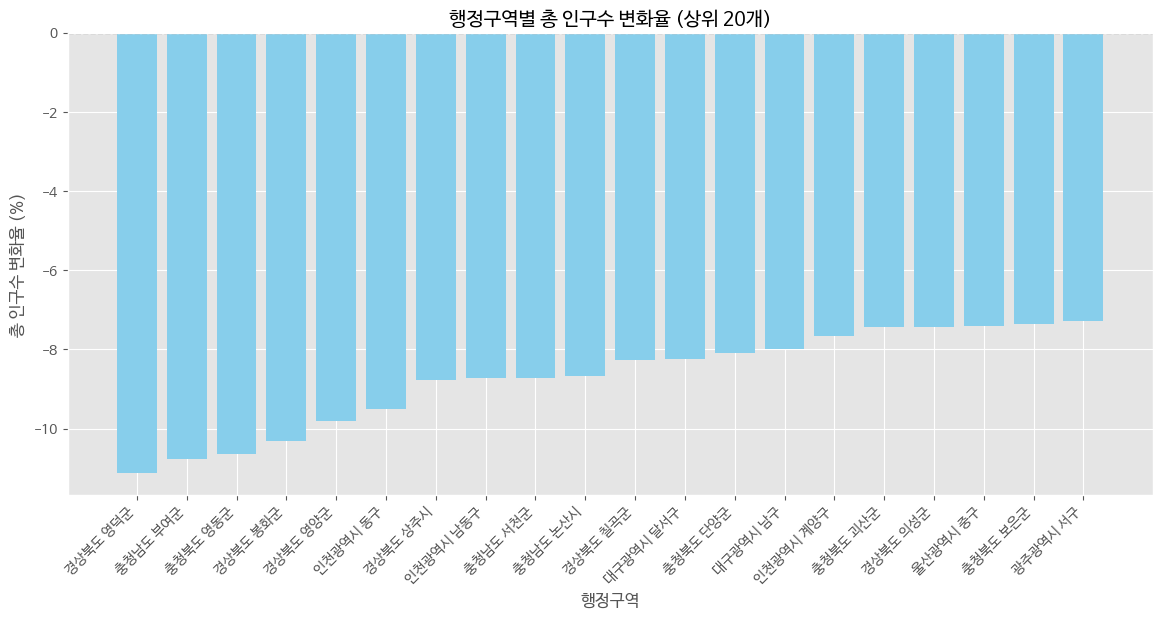

In [115]:
# 상위 20개 행 추출
top20 = dt_sub.head(20)

# 그래프 크기 설정
plt.figure(figsize=(14, 6))

# 막대그래프
plt.bar(top20['행정구역'], top20['총 인구수 변화율(%)'], color='skyblue')

# 선 중앙 정렬
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

# 시각 요소
plt.title("행정구역별 총 인구수 변화율 (상위 20개)", fontsize=14)
plt.xlabel("행정구역", fontsize=12)
plt.ylabel("총 인구수 변화율 (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
# plt.tight_layout()

# 출력
plt.show()